In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_hdf("n2_horror_exp.h5", key="df")

df['energy_tcc_casscf_t'] = df.energy_tcc_casscf + df.triples_casscf
df['energy_tcc_hf_t'] = df.energy_tcc_hf + df.triples_hf

<Axes: xlabel='rnn', ylabel='energy'>

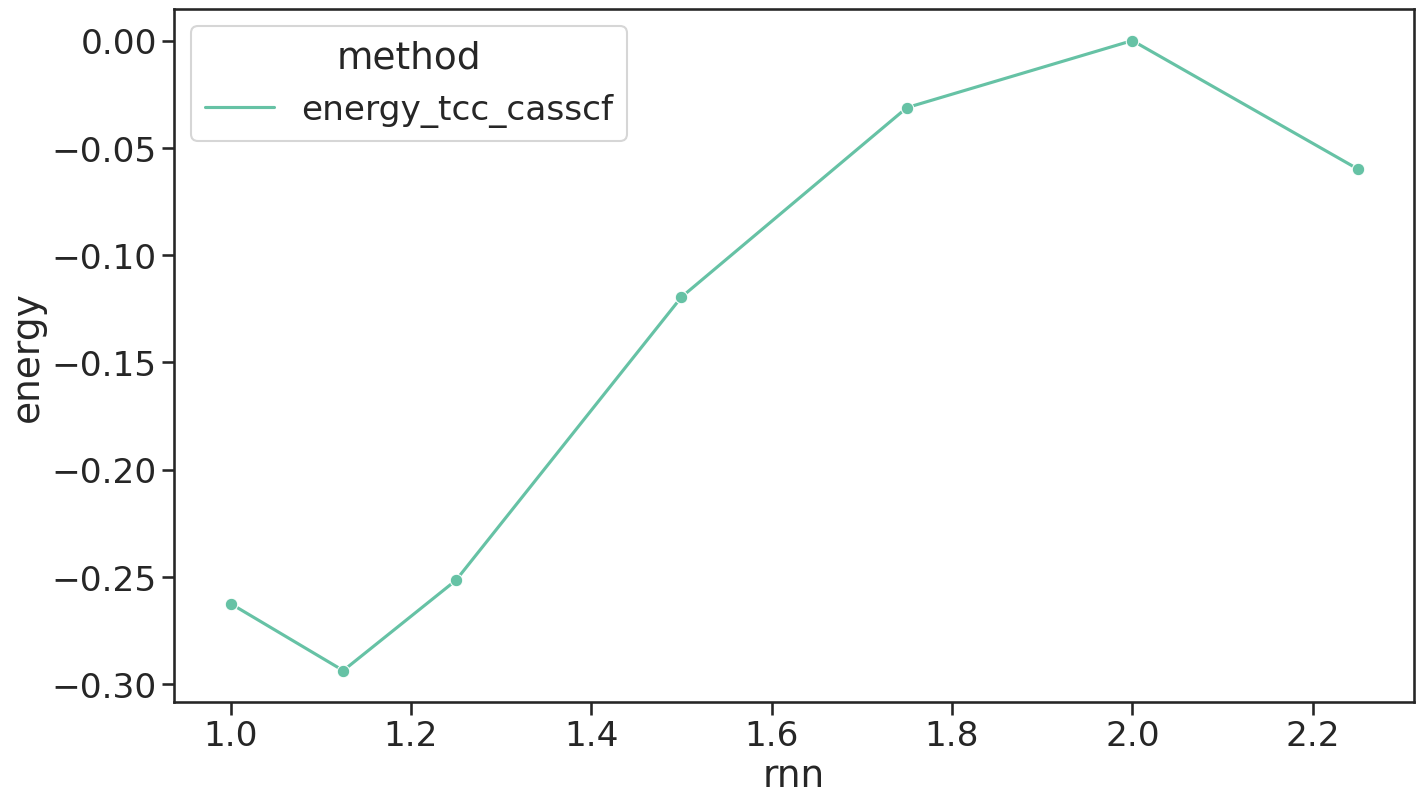

In [3]:
dfm = pd.melt(
    df, id_vars=['rnn'], value_name="energy", value_vars=[
        'energy_tcc_casscf',
        # 'energy_tcc_hf',
        # 'energy_tcc_casscf_t',
        # 'energy_tcc_hf_t',
    ], var_name="method"
)

# ref_energy = np.unique(df.energy_casci.values)
dfm['energy'] = dfm.groupby('method')['energy'].transform(lambda x: np.array(x) - np.max(x))
# display(dfm)

sns.set_theme(context="talk", font_scale=1.5, palette="Set2", style="ticks")
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 9)
sns.lineplot(
    data=dfm, x="rnn", y="energy", hue="method", ax=ax, marker="o"
)